In [29]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [30]:
url='https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
df=pd.read_csv(url)

troca={
    0:1,
    1:0
}

df['finished']=df.unfinished.map(troca)
x=df[['expected_hours','price']]
y=df['finished']

In [31]:
SEED=5
np.random.seed(SEED)
raw_train_x,raw_test_x,train_y,test_y=train_test_split(x,y,stratify=y,test_size=0.25)

scaler=StandardScaler()
scaler.fit(raw_train_x)
train_x=scaler.transform(raw_train_x)
test_x=scaler.transform(raw_test_x)


model=SVC()
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print((accuracy_score(test_y,prediction))*100)

66.85185185185185


In [32]:
base_line=np.ones(len(test_y))
print((accuracy_score(test_y,base_line))*100)

52.59259259259259


-1.7348767953644189 1.7418048354450535 -0.5962799114048444 5.406738368968601


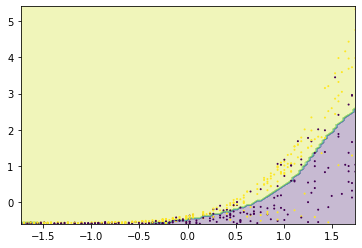

In [37]:
data_x=test_x[:,0]
data_y=test_x[:,1]
x_min=data_x.min()
x_max=data_x.max()
y_min=data_y.min()
y_max=data_y.max()
print(x_min,x_max,y_min,y_max)
n_poits=100
x_fig=np.linspace(x_min,x_max,n_poits)
y_fig=np.linspace(y_min,y_max,n_poits)
xx,yy=np.meshgrid(x_fig,y_fig)
dots=np.c_[xx.ravel(),yy.ravel()]
Z=model.predict(dots)
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(data_x,data_y,c=test_y,s=1)

#Decision boundary